# Graduate Rotational Internship Program
# *The Sparks Foundation*

#Task1
#Objective: Prediction using Decision Tree Algorithm
#Author: P V S N Deepak

#Importing required libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [238]:
#Dataset Loading
df=pd.read_csv("Iris.csv")

In [239]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [240]:
df.shape

(150, 6)

In [241]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [242]:
df.drop(['Id'],axis=1,inplace=True)

In [243]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

#Data Visualization

Text(0.5, 1.0, 'Species v/s SepalLength')

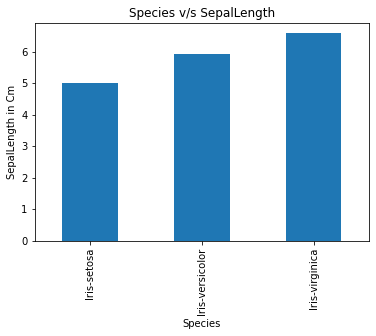

In [199]:
df.groupby('Species')['SepalLengthCm'].mean().plot.bar()
plt.ylabel('SepalLength in Cm')
plt.title('Species v/s SepalLength')

Text(0.5, 1.0, 'Species v/s SepalWidth')

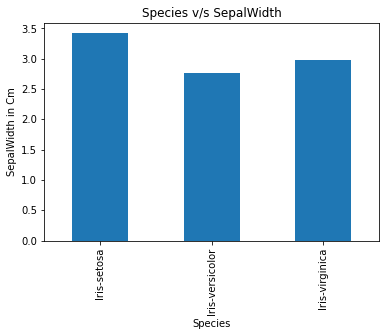

In [200]:
df.groupby('Species')['SepalWidthCm'].mean().plot.bar()
plt.ylabel('SepalWidth in Cm')
plt.title('Species v/s SepalWidth')

Text(0.5, 1.0, 'Species v/s PetalLength')

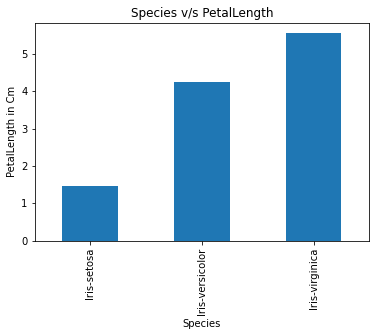

In [201]:
df.groupby('Species')['PetalLengthCm'].mean().plot.bar()
plt.ylabel('PetalLength in Cm')
plt.title('Species v/s PetalLength')

Text(0.5, 1.0, 'Species v/s PetalWidth')

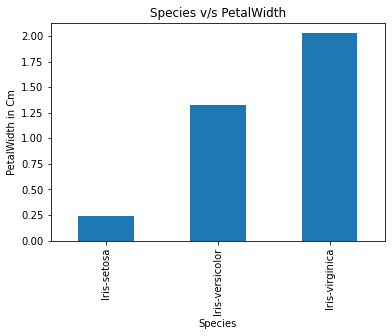

In [202]:
df.groupby('Species')['PetalWidthCm'].mean().plot.bar()
plt.ylabel('PetalWidth in Cm')
plt.title('Species v/s PetalWidth')

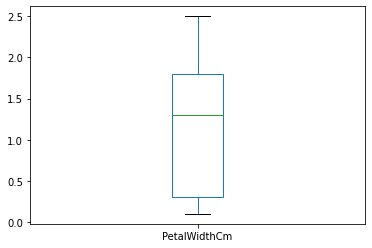

In [203]:
df['PetalWidthCm'].plot.box()

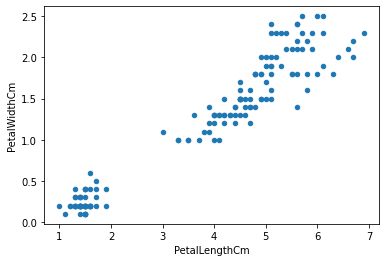

In [204]:
df.plot.scatter('PetalLengthCm','PetalWidthCm')

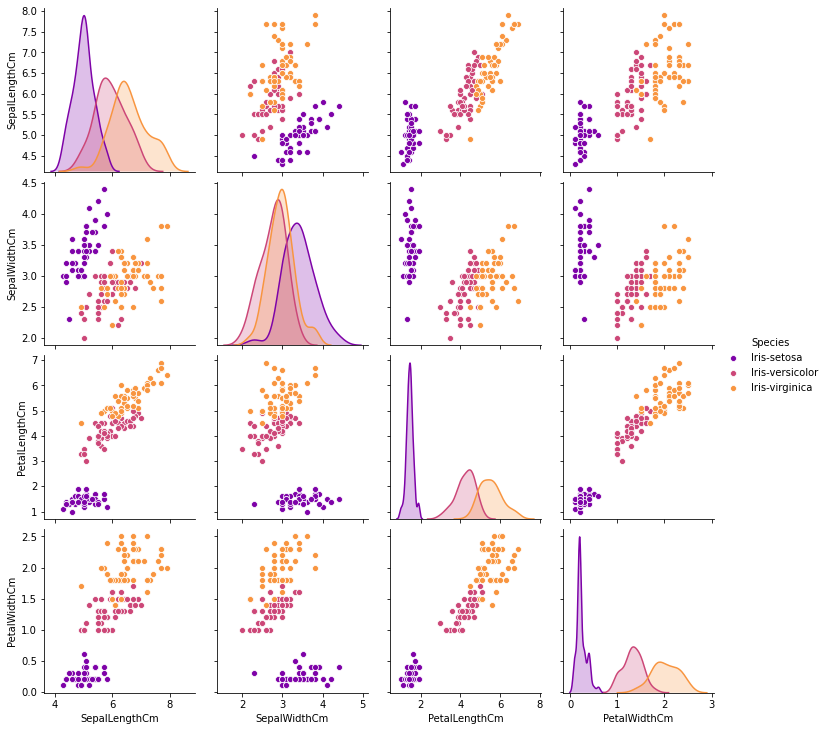

In [303]:
sns.pairplot(df,hue='Species',palette='plasma')

In [246]:
#segregating data
y=df['Species']
x=df.drop(['Species'],axis=1)

#Splitting the data into train and validation datasets in 4:1 ratio

In [247]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y=train_test_split(x,y,random_state=101,stratify=y,test_size=0.2)

In [248]:
train_y.value_counts(normalize=True)

Iris-versicolor    0.333333
Iris-setosa        0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

In [249]:
valid_y.value_counts(normalize=True)

Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Species, dtype: float64

In [250]:
train_x.shape,train_y.shape

((120, 4), (120,))

In [251]:
valid_x.shape,valid_y.shape

((30, 4), (30,))

#Model building using DecisionTreeClassifier

In [252]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [253]:
dt_model=dtc(random_state=10)

In [254]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(random_state=10)

In [305]:
acc=dt_model.score(valid_x,valid_y)
print('Accuracy score is:',acc)

Accuracy score is: 0.9666666666666667


In [306]:
#predictions on validation set
dt_model.predict(valid_x)

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica'], dtype=object)

In [307]:
#predicting probabilities for classes 0,1,&2
dt_model.predict_proba(valid_x)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [309]:
y_pred = dt_model.predict_proba(valid_x)[:,1]

In [310]:
new_y = []
for i in range(len(y_pred)):
    if y_pred[i]<0.6 :#changing threshold to 0.6
        new_y.append(0)
    else:
        new_y.append(1)

In [314]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y,new_y)

0.0

#Optimising max depth

In [315]:
train_accuracy=[]
valid_accuracy=[]
data_accuracy=[]
for depth in range(1,10):
    dt_model=dtc(max_depth=depth,random_state=55)
    dt_model.fit(train_x,train_y)
    train_accuracy.append(dt_model.score(train_x,train_y))
    valid_accuracy.append(dt_model.score(valid_x,valid_y))
    data_accuracy.append(dt_model.score(x,y))

In [316]:
frame=pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy,'valid_acc':valid_accuracy,'data_acc':data_accuracy})
frame.head(15)

,max_depth,train_acc,valid_acc,data_acc
0,1,0.666667,0.666667,0.666667
1,2,0.958333,0.966667,0.960000
2,3,0.975000,0.966667,0.973333
3,4,1.000000,0.966667,0.993333
4,5,1.000000,0.966667,0.993333
5,6,1.000000,0.966667,0.993333
6,7,1.000000,0.966667,0.993333
7,8,1.000000,0.966667,0.993333
8,9,1.000000,0.966667,0.993333


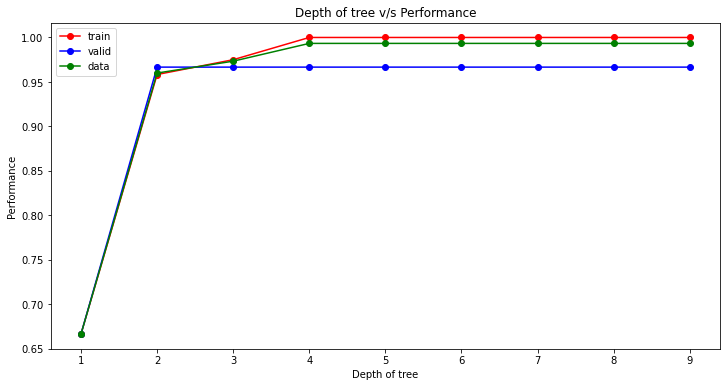

In [317]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o',color='red',label='train')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o',color='blue',label='valid')
plt.plot(frame['max_depth'],frame['data_acc'],marker='o',color='green',label='data')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.title('Depth of tree v/s Performance')
plt.legend()

In [291]:
#creating another decision tree with optimised max_depth
dt_model=dtc(max_depth=5,max_leaf_nodes=15,random_state=10)

In [292]:
dt_model.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=10)

In [293]:
dt_model.score(valid_x,valid_y)

0.9666666666666667

In [294]:
dtree1=dtc()
dtree1.fit(x,y)

DecisionTreeClassifier()

#Visualising the Decisiontree

In [318]:
from sklearn import tree

In [319]:
!pip install graphviz

In [320]:
decision_tree=tree.export_graphviz(dtree1,out_file='tree.dot',feature_names=x.columns,max_depth=5,filled=True)

In [321]:
#Converting image from dot to png format
!dot -Tpng tree.dot -o tree.png

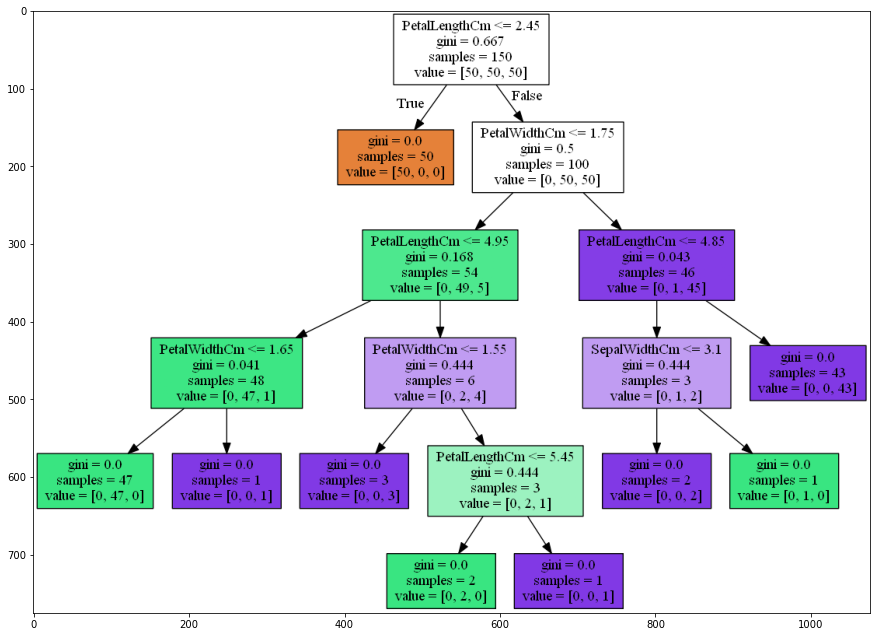

In [322]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)